<a href="https://colab.research.google.com/github/17004963/SP1-LABS/blob/master/Copia_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt


In [0]:
IMAGE_SIZE = (150, 150)
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

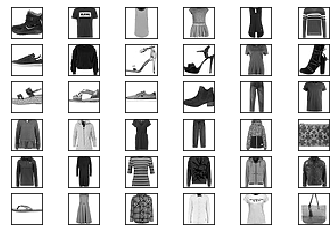

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 

for i in range(36):    
   
    plt.subplot(6, 6, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
   
    plt.imshow(x_train[i], cmap=plt.cm.binary)
     

plt.show()

In [0]:

X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [0]:
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
 
    plt.figure(figsize=(20,20))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='white')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

In [0]:

model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
 

model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [0]:

history_train=model_with_conv.fit(X_train_final, y_train,epochs=5)
history=model_with_conv.evaluate(X_test_final,  y_test,verbose=2)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0954 - accuracy: 0.9664
Epoch 2/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0665 - accuracy: 0.9763
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0548 - accuracy: 0.9800
Epoch 4/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0461 - accuracy: 0.9837
Epoch 5/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0400 - accuracy: 0.9848
10000/10000 - 4s - loss: 0.3953 - accuracy: 0.9170


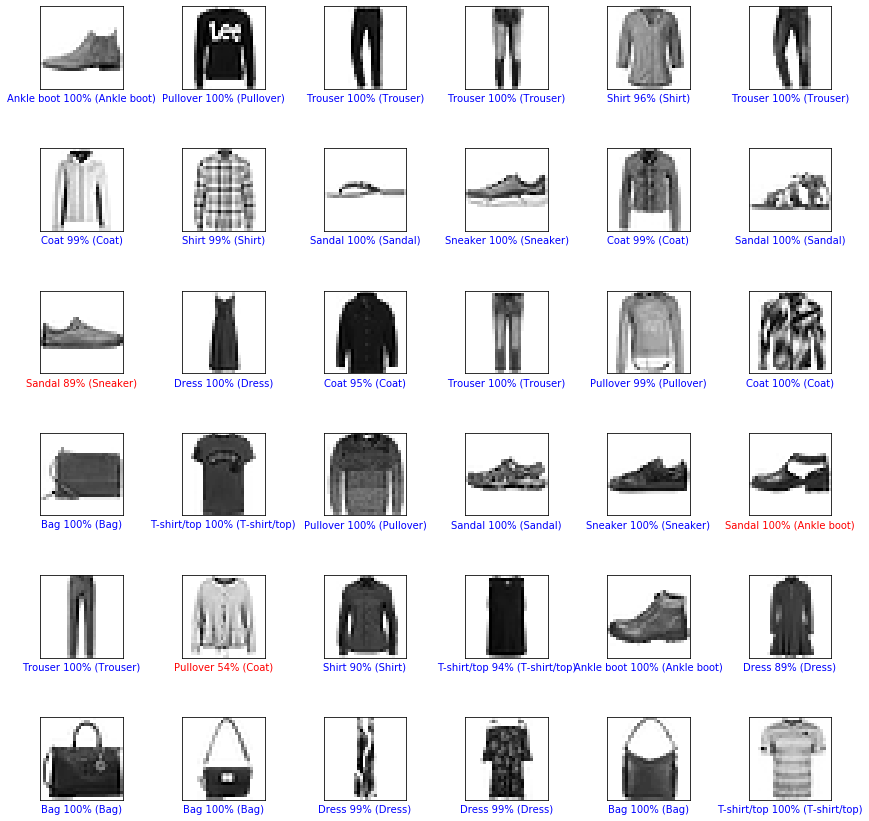

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
   
  plt.imshow(img[...,0], cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
   
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
                                 
                                 
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
test_images = X_test_final[:num_images]
predictions = model_with_conv.predict(test_images)
for i in range(num_images):    
    plt.subplot(num_rows, num_cols, i+1)   
    plot_image(i, predictions, y_test, test_images)    
 
plt.tight_layout()
plt.show()